# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [200]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

In [514]:
#Define function to find the first ten instances of a digit
def find_first_10(lst, digit):
    return [i for i, x in enumerate(lst) if x<digit + .001 and x>digit - .001][:10]


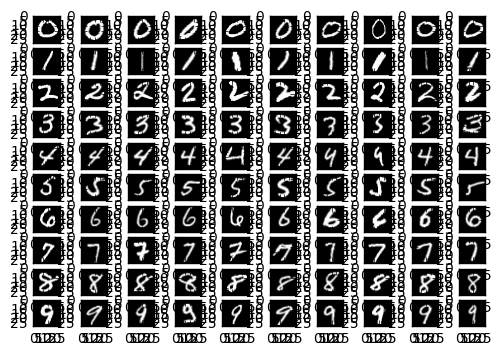

In [516]:
def P1(num_examples=10):

    ### STUDENT START ###
    #initialize the list that will contain the indices of the examples we want to plot
    example_digits = []
    
    #Populate this list with the first ten observations of each digit
    for i in range(num_examples):
        example_digits = example_digits + find_first_10(mini_train_labels, i)

        
    for example in range(len(example_digits)):
        plt.subplot(num_examples,num_examples, example + 1)
        matrix = mini_train_data[example_digits[example]].reshape((28,28))
        plt.set_cmap('gray')
        plt.imshow(matrix)

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [133]:
?classification_report()

In [137]:
def P2(k_values):

    ### STUDENT START ###
    for k in k_values:
        #define the classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors = k, p = 2)
        #fit the model on the mini training data
        knn.fit(mini_train_data, mini_train_labels)
        #test on the development set
        preds = knn.predict(dev_data)
        #get number correct
        correct = sum(preds == dev_labels)
        total = dev_data.shape[0]
        #report results on the development set
        print "KNN Accuracy Where k = " + str(k) + ": {:.3}".format(1.0 * correct / total)
        
    
    #detailed report for k = 1
    #define classifier  
    knn_k1 = KNeighborsClassifier(n_neighbors = 1, p = 2)
    #fit model
    knn_k1.fit(mini_train_data, mini_train_labels)
    #test on development set
    preds = knn_k1.predict(dev_data)
    print "Summary of KNN Performance Where K = 1"
    print classification_report(dev_labels, preds)


### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

KNN Accuracy Where k = 1: 0.888
KNN Accuracy Where k = 3: 0.878
KNN Accuracy Where k = 5: 0.869
KNN Accuracy Where k = 7: 0.865
KNN Accuracy Where k = 9: 0.863
Summary of KNN Performance Where K = 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



ANSWER:

For k = 1, the most difficult digit to predict depends on the measure we use to define 'difficult'.  
- Based on precision, the most difficult digit to predict is 3.  
- Based on recall, the most difficult digit to predict is 2.  
- Based on F1, the most difficult digit to predict is 9.  

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [163]:
def P3(train_sizes, accuracies):

    ### STUDENT START ###

    #initialize the accuracy results list
    accuracy_results = accuracies

    for size in train_sizes:
        #get subset of training data
        train_data_subset, train_labels_subset = train_data[:size], train_labels[:size]

        #define classifier  
        knn_k1 = KNeighborsClassifier(n_neighbors = 1, p = 2)
        
        #get start time
        start_time = time.time()
        
        #fit model
        knn_k1.fit(train_data_subset, train_labels_subset)
        
        #test on development set
        #get predictions
        preds = knn_k1.predict(dev_data)
        
        #get end time
        end_time = time.time()
        
        #get accuracy metrics
        correct = sum(preds == dev_labels)
        total = dev_labels.shape[0]
        accuracy = correct / (1.0 * total)
        
        #get time
        prediction_time = end_time - start_time

        #append accuracy for this training size to accuracies list
        accuracy_results.append(accuracy)
        
        #print result
        print 'Training size: {} (accuracy: {:.3} prediction time: {:.3}s)'.format(size, 1.0 * correct / total, prediction_time)

    #return the accuracies list
    return accuracy_results

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)



Training size: 100 (accuracy: 0.72 prediction time: 0.0913s)
Training size: 200 (accuracy: 0.786 prediction time: 0.18s)
Training size: 400 (accuracy: 0.841 prediction time: 0.403s)
Training size: 800 (accuracy: 0.884 prediction time: 0.809s)
Training size: 1600 (accuracy: 0.902 prediction time: 1.65s)
Training size: 3200 (accuracy: 0.926 prediction time: 3.21s)
Training size: 6400 (accuracy: 0.937 prediction time: 6.65s)
Training size: 12800 (accuracy: 0.959 prediction time: 14.1s)
Training size: 25000 (accuracy: 0.97 prediction time: 32.0s)


[0.71999999999999997,
 0.78600000000000003,
 0.84099999999999997,
 0.88400000000000001,
 0.90200000000000002,
 0.92600000000000005,
 0.93700000000000006,
 0.95899999999999996,
 0.96999999999999997]

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [165]:
results = []
results = P3(train_sizes, results)


Training size: 100 (accuracy: 0.72 prediction time: 0.092s)
Training size: 200 (accuracy: 0.786 prediction time: 0.185s)
Training size: 400 (accuracy: 0.841 prediction time: 0.391s)
Training size: 800 (accuracy: 0.884 prediction time: 0.824s)
Training size: 1600 (accuracy: 0.902 prediction time: 1.68s)
Training size: 3200 (accuracy: 0.926 prediction time: 3.46s)
Training size: 6400 (accuracy: 0.937 prediction time: 6.47s)
Training size: 12800 (accuracy: 0.959 prediction time: 13.8s)
Training size: 25000 (accuracy: 0.97 prediction time: 30.7s)


[0.71999999999999997,
 0.78600000000000003,
 0.84099999999999997,
 0.88400000000000001,
 0.90200000000000002,
 0.92600000000000005,
 0.93700000000000006,
 0.95899999999999996,
 0.96999999999999997]

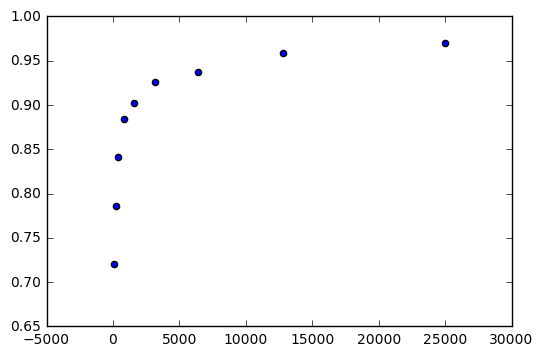

In [183]:
plt.scatter(train_sizes, results)

In [182]:
def P4():
    
    #get accuracy results for the list of training sizes
    #results = []
    #results = P3(train_sizes, results)

    ### STUDENT START ###
    #set up training sizes and accuracies as matrices
    results_for_lm = np.array(results).reshape(-1,1)
    train_sizes_for_lm = np.array(train_sizes).reshape(-1,1)

    #define the model
    regression_model = LinearRegression()

    #fit the model based on accuracy results and training sizes
    training_size_acc_fit = regression_model.fit(train_sizes_for_lm, results_for_lm)

    #set a variable equal to 60,000 so we can prdict accuracy when n = 60,000
    n_60k = np.array(60000)

    n_60k_pred_accuracy = training_size_acc_fit.predict(n_60k)
    print "With n = 60,000, the predicted accuracy of the KNN model is : " + str(round(n_60k_pred_accuracy[0][0],3))

    ### STUDENT END ###

P4()

With n = 60,000, the predicted accuracy of the KNN model is : 1.243


In [248]:
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]

test = pd.DataFrame(train_sizes, columns = ["train_sizes"])
#train_sizes_inv
test['train_sizes_inv'] = 1 / test['train_sizes']

#add accuracies to the data frame
results_series = results.flatten()
results_series
test['accuracies'] = results_series
test
#test[['train_sizes', 'train_sizes_inv']].values
#test['accuracies']
#fit simple regression
#test_lm = LinearRegression()
#test_train_size_model = test_lm.fit(test['train_sizes'], test['accuracies'])


#plt.scatter(train_sizes_inv, results)

#test_acc_fit = regression_model.fit(test_model_sizes, )

,train_sizes,train_sizes_inv,accuracies
0,100,0.010000,0.720
1,200,0.005000,0.786
2,400,0.002500,0.841
3,800,0.001250,0.884
4,1600,0.000625,0.902
5,3200,0.000313,0.926
6,6400,0.000156,0.937
7,12800,0.000078,0.959
8,25000,0.000040,0.970


ANSWER:  

The problem with this model is that as the sample size grows, the model can predict an accuracy above 100% as it does for n = 60,000.  
One we could addresss this issue would be to add the inverse of sample size to the regression model that predicts accuracy from sample size.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

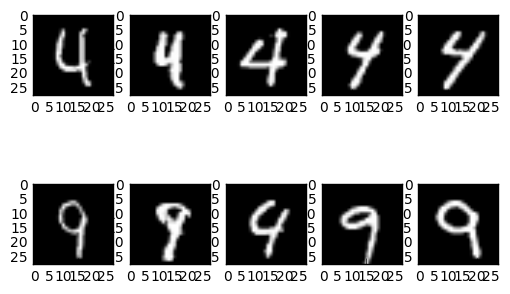

In [312]:
def P5():

### STUDENT START ###
#define classifier  
    knn_k1 = KNeighborsClassifier(n_neighbors = 1, p = 2)

    #fit the model
    knn_k1.fit(mini_train_data, mini_train_labels)

    #get predictions for development data
    preds = knn_k1.predict(dev_data)

    #produce confusion matrix
    confusion_matrix(dev_labels, preds)

    #nines and fours are the most frequently confused digits.
    #get a list of the indices when 4 was predicted but actual was 9 and vice versa.

    #put predictions and actual labels into dataframe
    pred_series = pd.Series(preds)
    dev_labels_series = pd.Series(dev_labels)

    pred_actual_df = pd.DataFrame()
    pred_actual_df['preds'] = pred_series
    pred_actual_df['dev_labels'] = dev_labels_series


    #define a function that can be applied to each row to flag examples where KNN misread a 4 or a 9.
    def flag_misread_9s(row):
        if row['preds'] != row['dev_labels'] and row['dev_labels'] == 9:
            return True
        else:
            return False

    def flag_misread_4s(row):
        if row['preds'] != row['dev_labels'] and row['dev_labels'] == 4:
            return True
        else:
            return False

    #Apply these functions row-wise to actually flag rows
    pred_actual_df['misread_4s'] = pred_actual_df.apply(flag_misread_4s, axis = 1)
    pred_actual_df['misread_9s'] = pred_actual_df.apply(flag_misread_9s, axis = 1)

    #Get the indices where 4s were misread
    missed_4_indices = pred_actual_df[pred_actual_df['misread_4s']].index.tolist()[:5]
    missed_9_indices = pred_actual_df[pred_actual_df['misread_9s']].index.tolist()[:5]

    #initialize the list that will contain the indices of the examples we want to plot
    example_digits = missed_4_indices + missed_9_indices

    #Plot examples 
    for example in range(len(example_digits)):
        plt.subplot(2, 5, example + 1)
        matrix = dev_data[example_digits[example]].reshape((28,28))
        plt.set_cmap('gray')
        plt.imshow(matrix)
    
### STUDENT END ###

P5()


(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [322]:
#Gaussian blur notes

#need to reshape the array to 30 x 30
#for each pixel, get a 3x3 array of weights
#

Object `gnb` not found.


In [440]:
#This cell shows how to get a new point value by weighting a point and its neighbors using the gaussian function
#It takes a point and its neighbors values

#define gaussian function
def gaussian_2d(x, y, sigma = 1):
    weight = (1 / (2 * np.pi * (sigma**2))) * (np.e ** ((-1) * ((float(x) ** 2 + float(y) **2) / (2 * sigma **2))))
    return weight

#create empty array to populate with weights
gaussian_weights = np.zeros(shape=(3,3))

#Set s to use for sigma in the gaussian function
s = 1

#populate this array with values from the gaussian distribution
for ix in range(3):
    for iy in range(3):
        gaussian_weights[ix, iy] = gaussian_2d(x = ix - 1, y = -(iy - 1), sigma = s)

#create a test point with a square of neighbors around it, so a 3x3 matrix
test_point = np.array([1., 2., 3., 3., 1., 4., 1., 4., 2.])
test_point = test_point.reshape(3,3)

#initialize new point value
new_point = 0

#multiply each corresponding element of the test point and its neighbors with the gaussian weights calculated above
for ix in range(3):
    for iy in range(3):
        new_point += test_point[ix,iy] * gaussian_weights[ix,iy]
        
new_point

1.8239243479528304

In [442]:
#Define a function that takes a 3x3 matrix as an argument and gets the gaussian weighted value of its center point.

#first, get 3x3 matrix
test_point = np.array([1., 2., 3., 3., 1., 4., 1., 4., 2.])
test_point = test_point.reshape(3,3)

#define the function
def get_new_point(first_point_neighbors):
    new_point = 0
    for ix in range(3):
        for iy in range(3):
            new_point += first_point_neighbors[ix,iy] * gaussian_weights[ix,iy]
    return new_point

test_new_point = get_new_point(test_point)
test_new_point 

1.8239243479528304

In [448]:
#This cell shows how to insert a border of zeroes around the matrix


test_image = mini_train_data[0]
test_image = test_image.reshape(28,28)
test_image.shape

#create zero row
zero_row = np.zeros(shape = (1,28))

#create zero column
zero_column = np.zeros(shape = (30,1))

#insert a border of zeroes around the matrix
test_image = np.insert(test_image, 0, zero_row, 0)
test_image = np.append(test_image, zero_row, 0)
test_image = np.insert(test_image, 0, 0, 1)
test_image = np.append(test_image, zero_column, 1)


test_image = test_image.shape


(30, 30)

In [461]:
#define a function to insert a border of zeroes around each matrix
def insert_zero_border(image_matrix):
    #create zero row
    zero_row = np.zeros(shape = (1,28))
    #create zero column
    zero_column = np.zeros(shape = (30,1))
    
    #insert borders
    new_matrix = np.insert(image_matrix, 0, zero_row, 0)
    new_matrix = np.append(new_matrix, zero_row, 0)
    new_matrix = np.insert(new_matrix, 0, 0, 1)
    new_matrix = np.append(new_matrix, zero_column, 1)
    
    return new_matrix

test_image = mini_train_data[0]
test_image = test_image.reshape(28,28)
test_image.shape

test_w_zero_borders = insert_zero_border(test_image)
test_w_zero_borders.shape

(30, 30)

In [437]:
#matrix indexing
test_row = np.arange(25)
test_row = test_row.reshape(5,5)

test_row

test_subset = test_row[0:3, 0:3]
test_subset

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12]])

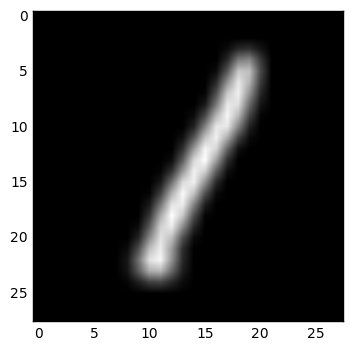

In [460]:
#for each point in the original array, get the new value using gaussian weights of its neighbors values
blurred_point = np.zeros(shape =(28,28))

for ix in range(1,29):
    for iy in range(1,29):
        
        #Get the original point and its neighbors
        point_and_neighbors = test_image[ix-1:ix+2, iy-1:iy+2]

        #get new point value
        new_point = get_new_point(point_and_neighbors)
        
        #populate the blurred point matrix with the weighted points
        blurred_point[ix-1,iy-1] = new_point


plt.imshow(test_image)  
plt.imshow(blurred_point)

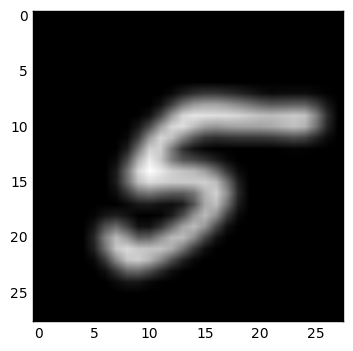

In [501]:
#Define a function that takes original flattened image representation and returns a new flattened blurred image representation


def get_blurred_image(orig_matrix):
    blurred_point = np.zeros(shape =(28,28))
    #reshape the flattened array to a 28x28 matrix
    orig_matrix = orig_matrix.reshape(28,28)
    #add zero borders
    orig_matrix_w_borders = insert_zero_border(orig_matrix)

    for ix in range(1,29):
        for iy in range(1,29):

            #Get the original point and its neighbors
            point_and_neighbors = orig_matrix_w_borders[ix-1:ix+2, iy-1:iy+2]

            #get new point value
            new_point = get_new_point(point_and_neighbors)

            #populate the blurred point matrix with the weighted points
            blurred_point[ix-1,iy-1] = new_point
            
    return blurred_point.reshape(1,784)

test_image = mini_train_data[29]
test_blurred_image = get_blurred_image(test_image)
plt.imshow(test_image.reshape(28,28))
plt.imshow(test_blurred_image.reshape(28,28))


In [490]:
#test = np.array()

test = np.empty(shape = (1,784))

for i in range(mini_train_data.shape[0]):
    row = mini_train_data[i].reshape(1,784)
    test = np.append(test, row, 0)


test = test[1:]

test.shape

(1000, 784)

In [510]:
#get blurred image values for each point in the original array

def get_blurred_points_set(set_of_points):
    #initialize array to hold blurred points
    blurred_points = np.empty(shape = (1,784))

    #loop over each row in the set fed to the function and get the blurred point values
    for i in range(set_of_points.shape[0]):
        new_blurred_point = get_blurred_image(set_of_points[i])
        blurred_points = np.append(blurred_points, new_blurred_point, 0)
        
    return blurred_points

mini_train_data_blurred = get_blurred_points_set(mini_train_data)[1:]

mini_train_data_blurred.shape

        

(1000, 784)

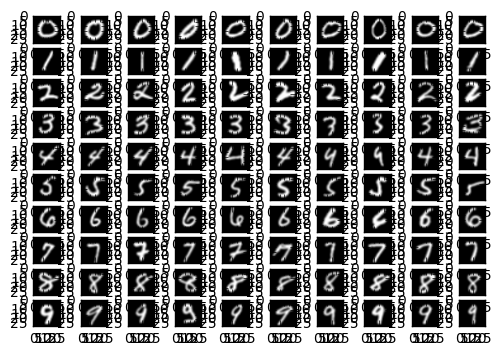

In [517]:
#test plots

def P1later(num_examples=10):

    ### STUDENT START ###
    #initialize the list that will contain the indices of the examples we want to plot
    example_digits = []
    
    #Populate this list with the first ten observations of each digit
    for i in range(num_examples):
        example_digits = example_digits + find_first_10(mini_train_labels, i)

        
    for example in range(len(example_digits)):
        plt.subplot(num_examples,num_examples, example + 1)
        matrix = mini_train_data_blurred[example_digits[example]].reshape((28,28))
        plt.set_cmap('gray')
        plt.imshow(matrix)

### STUDENT END ###

P1later(10)

In [ ]:
#def P6():
    
### STUDENT START ###
    #define gaussian function
    def gaussian_2d(x, y, sigma = 1):
        weight = (1 / (2 * np.pi * (sigma**2))) * (np.e ** ((-1) * ((float(x) ** 2 + float(y) **2) / (2 * sigma **2))))
        return weight

    #create empty array to populate with weights
    gaussian_weights = np.zeros(shape=(3,3))

    #Set s to use for sigma in the gaussian function
    s = 1

    #populate this array with values from the gaussian distribution
    for ix in range(3):
        for iy in range(3):
            gaussian_weights[ix, iy] = gaussian_2d(x = ix - 1, y = -(iy - 1), sigma = s)

    #define the function that takes a point and its closest neighbors as arguments and returns a gaussian weighted point
    def get_new_point(first_point_neighbors):
        #initialize new point value to zero
        new_point = 0
        for ix in range(3):
            for iy in range(3):
                new_point += first_point_neighbors[ix,iy] * gaussian_weights[ix,iy]
        return new_point
    
    def insert_zero_border(orig_point):
        
        orig_point_reshape = orig_point.reshape(28,28)
        
        #create zero row
        zero_row = np.zeros(shape = (1,28))
        #create zero column
        zero_column = np.zeros(shape = (30,1))

        #insert borders
        new_matrix = np.insert(image_matrix, 0, zero_row, 0)
        new_matrix = np.append(new_matrix, zero_row, 0)
        new_matrix = np.insert(new_matrix, 0, 0, 1)
        new_matrix = np.append(new_matrix, zero_column, 1)

        return new_matrix

    def get_blurred_image(orig_point):
        #initialize blurred point matrix
        blurred_point = np.zeros(shape =(28,28))

        #add zero borders
        orig_matrix_w_borders = insert_zero_border(orig_point)

        for ix in range(1,29):
            for iy in range(1,29):

                #Get the original point and its neighbors
                point_and_neighbors = orig_matrix_w_borders[ix-1:ix+2, iy-1:iy+2]

                #get new point value
                new_point = get_new_point(point_and_neighbors)

                #populate the blurred point matrix with the weighted points
                blurred_point[ix-1,iy-1] = new_point

        return blurred_point.reshape(1,784)

    def get_blurred_points_set(set_of_points):
        #initialize array to hold blurred points
        blurred_points = np.empty(shape = (1,784))

        #loop over each row in the set fed to the function and get the blurred point values
        for i in range(set_of_points.shape[0]):
            new_blurred_point = get_blurred_image(set_of_points[i])
            blurred_points = np.append(blurred_points, new_blurred_point, 0)

        return blurred_points

    

### STUDENT END ###

#P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [11]:
#def P7():

### STUDENT START ###


    
### STUDENT END ###

#P7()

ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [12]:
#def P8(alphas):

### STUDENT START ###



### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

In [14]:
#print nb.best_params_

ANSWER:

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [15]:
#def P9():

### STUDENT END ###


### STUDENT END ###

#gnb = P9()

ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [16]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [17]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()